In [1]:
import tensorflow as tf

In [2]:
# define the image size and batch size
img_size = (40, 40)
batch_size = 32

# Path to your dataset folder
data_dir = "D:/AJAYMON/AJAY/Programming/S6_Mini_Project/Dataset/Mixed_Marks_Dataset"

In [3]:
# use image_dataset_from_directory to load the data and split it into training and testing sets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=img_size,
    batch_size=batch_size)

Found 18135 files belonging to 8 classes.
Using 14508 files for training.
Found 18135 files belonging to 8 classes.
Using 3627 files for validation.


In [4]:
# inspect the class names and number of classes
class_names = train_ds.class_names
num_classes = len(class_names)
print('Class names:', class_names)
print('Number of classes:', num_classes)

Class names: ['0', '1', '2', '3', '4', '5', '6', '7']
Number of classes: 8


In [5]:
# convert images to grayscale
def grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)
    return image, label

train_ds = train_ds.map(grayscale)
val_ds = val_ds.map(grayscale)

# normalize pixel values to be between 0 and 1
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
val_ds = val_ds.map(lambda x, y: (x / 255.0, y))

In [6]:
# create the neural network
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(40, 40, 1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# The neural network architecture consists of sequential layers, where the output of one layer is passed as input to the next layer.

# The first layer is a convolutional layer with 16 filters of size 3x3, followed by a ReLU activation function. 
# The input shape of the layer is (40, 40, 1), which means that the layer expects input images of size 40x40 with one color channel (grayscale).

# The second layer is a max pooling layer that reduces the spatial dimensions of the output from the previous layer by taking the maximum value in each 2x2 window.

# The third layer is another convolutional layer with 32 filters of size 3x3, followed by a ReLU activation function.

# The fourth layer is another max pooling layer.

# The fifth layer is a flatten layer that flattens the output from the previous layer into a 1D vector.

# The sixth layer is a dense layer with 64 units and a ReLU activation function.

# The seventh and final layer is a dense layer with num_classes units and a softmax activation function, which produces the predicted class probabilities for the input image.

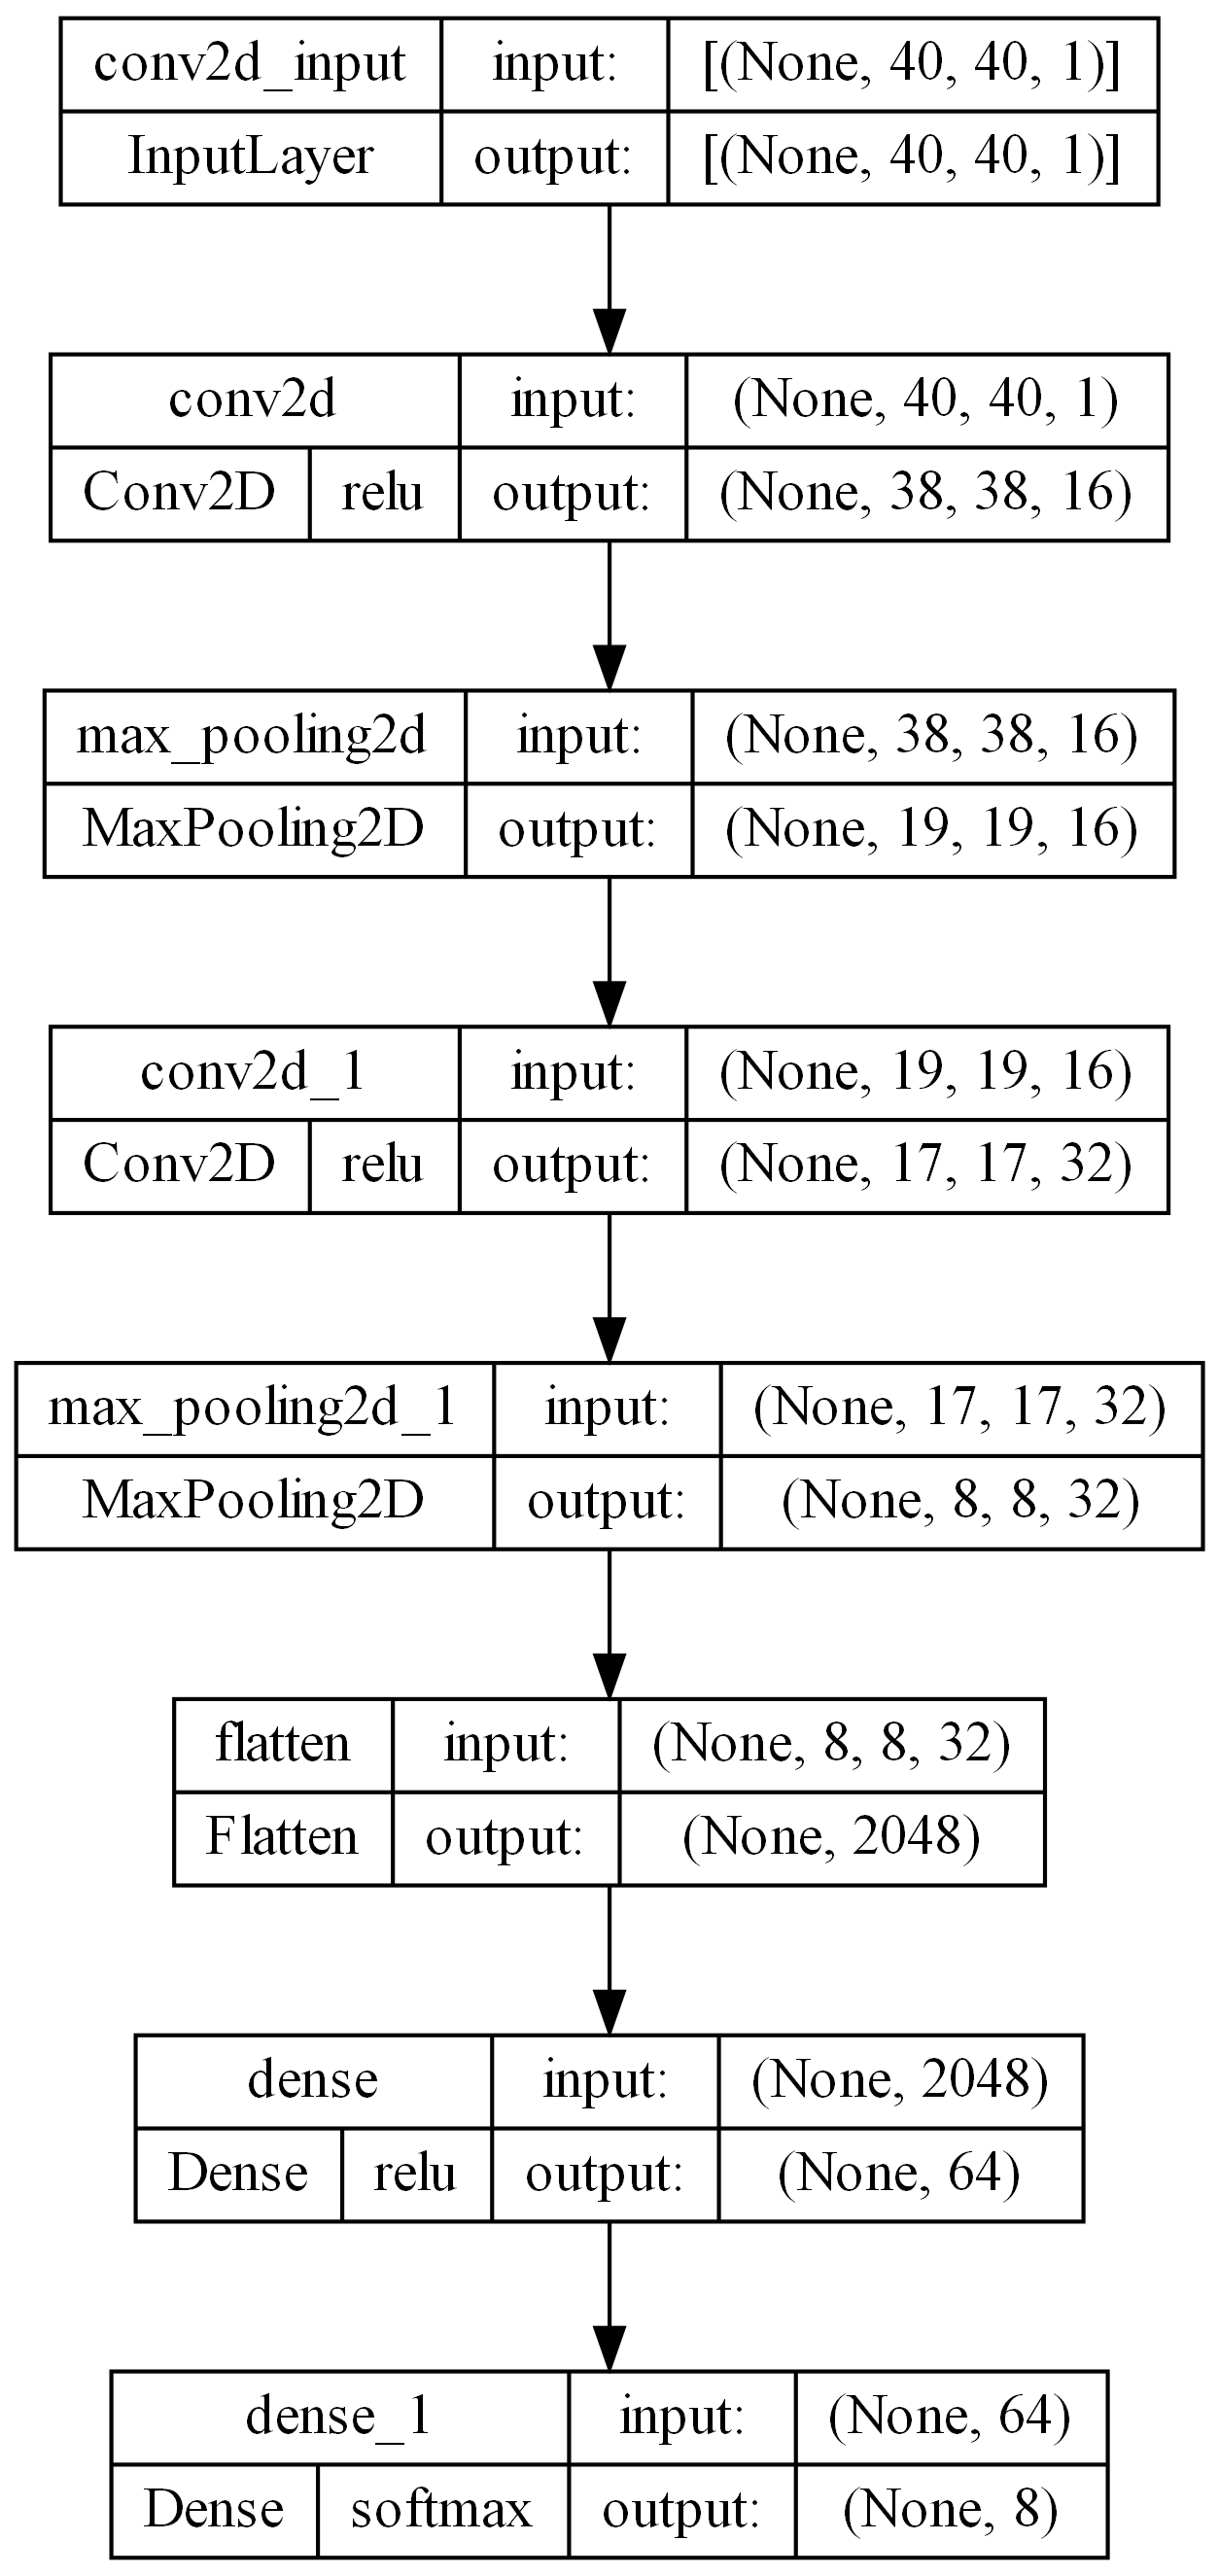

In [22]:
# For visualizing the model

from keras.utils.vis_utils import plot_model
plot_model(model, 
           to_file='model.png',
           show_shapes=True,
           show_dtype=False,
           show_layer_names=True,
           rankdir='TB',
           expand_nested=False,
           dpi=300,
           layer_range=None,
           show_layer_activations=True,
           show_trainable=False)

In [8]:
# from ann_visualizer.visualize import ann_viz;

# ann_viz(model, title="My first neural network")

In [10]:
# compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
# train the model
model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


C:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


454/454 [==============================] - 11s 23ms/step - loss: 1.0469 - accuracy: 0.6528 - val_loss: 0.5027 - val_accuracy: 0.8462
Epoch 2/10
454/454 [==============================] - 6s 13ms/step - loss: 0.3447 - accuracy: 0.8980 - val_loss: 0.2904 - val_accuracy: 0.9195
Epoch 3/10
454/454 [==============================] - 6s 14ms/step - loss: 0.2199 - accuracy: 0.9378 - val_loss: 0.2316 - val_accuracy: 0.9319
Epoch 4/10
454/454 [==============================] - 7s 15ms/step - loss: 0.1569 - accuracy: 0.9557 - val_loss: 0.1953 - val_accuracy: 0.9404
Epoch 5/10
454/454 [==============================] - 7s 14ms/step - loss: 0.1198 - accuracy: 0.9660 - val_loss: 0.1765 - val_accuracy: 0.9440
Epoch 6/10
454/454 [==============================] - 7s 14ms/step - loss: 0.0935 - accuracy: 0.9739 - val_loss: 0.1574 - val_accuracy: 0.9529
Epoch 7/10
454/454 [==============================] - 7s 15ms/step - loss: 0.0716 - accuracy: 0.9804 - val_loss: 0.1428 - val_accuracy: 0.9578
Epoch 8/1

In [17]:
loss, accuracy = model.evaluate(val_ds, verbose=0)

print(f'Testing accuracy: {(accuracy*100):.2f}%')

Validation accuracy: 95.81%


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# model.save('MP.h5')